In [1]:
# pip install yfinance

In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20,end.month,end.day)

In [4]:
stock = "GOOG"
google_data = yf.download(stock, start, end)

/var/folders/99/bb9zf8f92f7d1rr8x0ffnl7m0000gn/T/ipykernel_26454/2891900888.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  google_data = yf.download(stock, start, end)
[*********************100%***********************]  1 of 1 completed


In [5]:
google_data.head()

Price          Close      High       Low      Open     Volume
Ticker          GOOG      GOOG      GOOG      GOOG       GOOG
Date                                                         
2005-07-27  7.351830  7.384017  7.239670  7.371885  289798178
2005-07-28  7.266904  7.363714  7.261456  7.363714  237912424
2005-07-29  7.124786  7.250564  7.105721  7.233232  335785908
2005-08-01  7.220109  7.242145  7.133203  7.133699  227344963
2005-08-02  7.407785  7.415956  7.207976  7.219860  292701018

In [6]:
google_data.shape

(5031, 5)

In [7]:
google_data.describe()

Price         Close         High          Low         Open        Volume
Ticker         GOOG         GOOG         GOOG         GOOG          GOOG
count   5031.000000  5031.000000  5031.000000  5031.000000  5.031000e+03
mean      53.176442    53.726947    52.611747    53.155641  9.575124e+07
std       50.266096    50.816483    49.713973    50.239638  1.189276e+08
min        6.374077     6.669458     6.123016     6.499608  1.584340e+05
25%       13.979073    14.111041    13.865551    13.976844  2.578225e+07
50%       30.206551    30.461929    29.969355    30.263006  4.491600e+07
75%       74.173607    74.926822    73.493401    74.092337  1.202370e+08
max      207.224548   208.212225   203.782599   204.022044  1.650833e+09

In [8]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 2005-07-27 to 2025-07-25
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, GOOG)   5031 non-null   float64
 1   (High, GOOG)    5031 non-null   float64
 2   (Low, GOOG)     5031 non-null   float64
 3   (Open, GOOG)    5031 non-null   float64
 4   (Volume, GOOG)  5031 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 235.8 KB


In [9]:
google_data.isna().sum()

Price   Ticker
Close   GOOG      0
High    GOOG      0
Low     GOOG      0
Open    GOOG      0
Volume  GOOG      0
dtype: int64

In [10]:
# pip install matplotlib

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

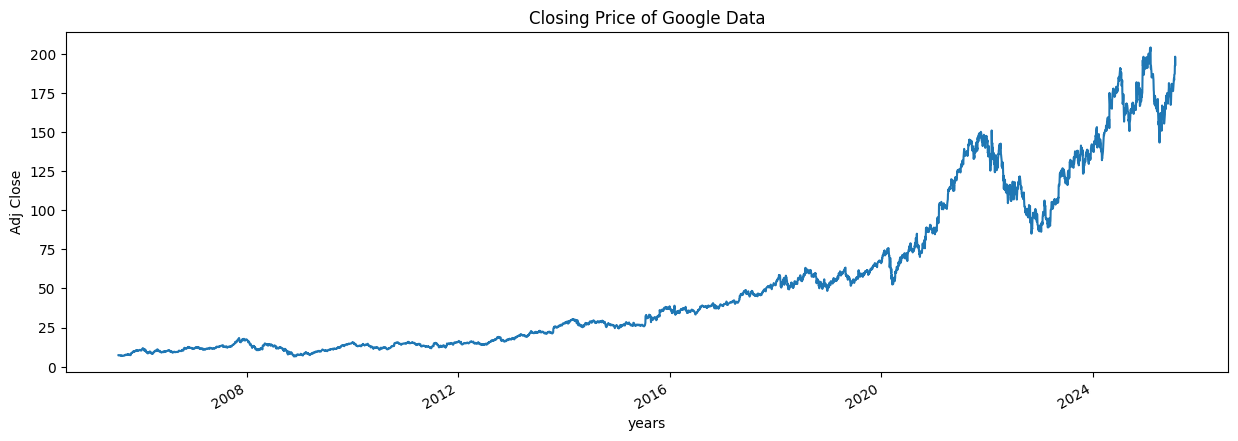

In [12]:
plt.figure(figsize = (15,5))
google_data['Open']['GOOG'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing Price of Google Data")
plt.show()

In [13]:
def plot_graph(figsize,values,column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google Data")
    plt.show()

In [14]:
google_data.columns

MultiIndex([( 'Close', 'GOOG'),
            (  'High', 'GOOG'),
            (   'Low', 'GOOG'),
            (  'Open', 'GOOG'),
            ('Volume', 'GOOG')],
           names=['Price', 'Ticker'])

In [15]:
google_data['MA_for_250_days'] = google_data['Open']['GOOG'].rolling(250).mean()

In [16]:
google_data['MA_for_250_days'][0:250].tail()

Date
2006-07-18         NaN
2006-07-19         NaN
2006-07-20         NaN
2006-07-21         NaN
2006-07-24    9.238748
Name: MA_for_250_days, dtype: float64

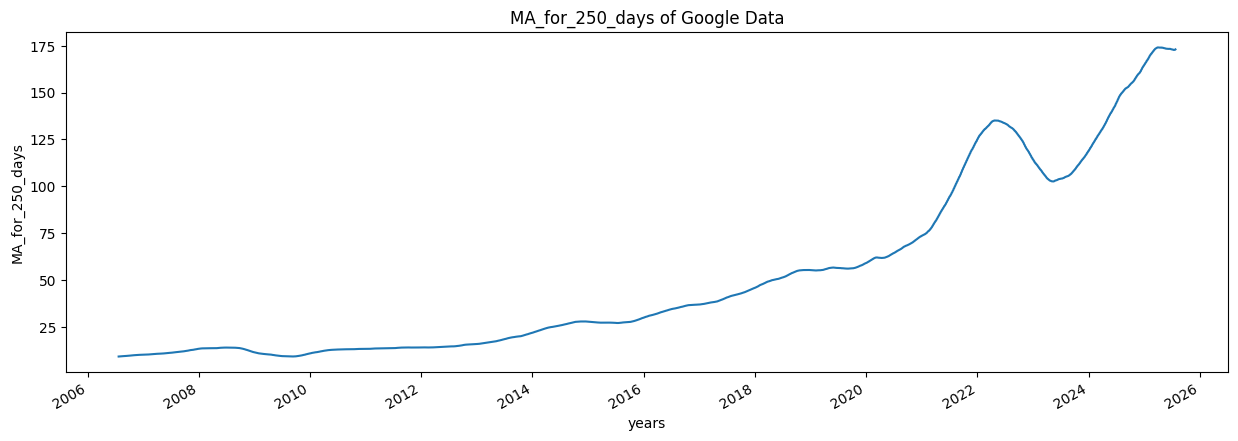

In [17]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

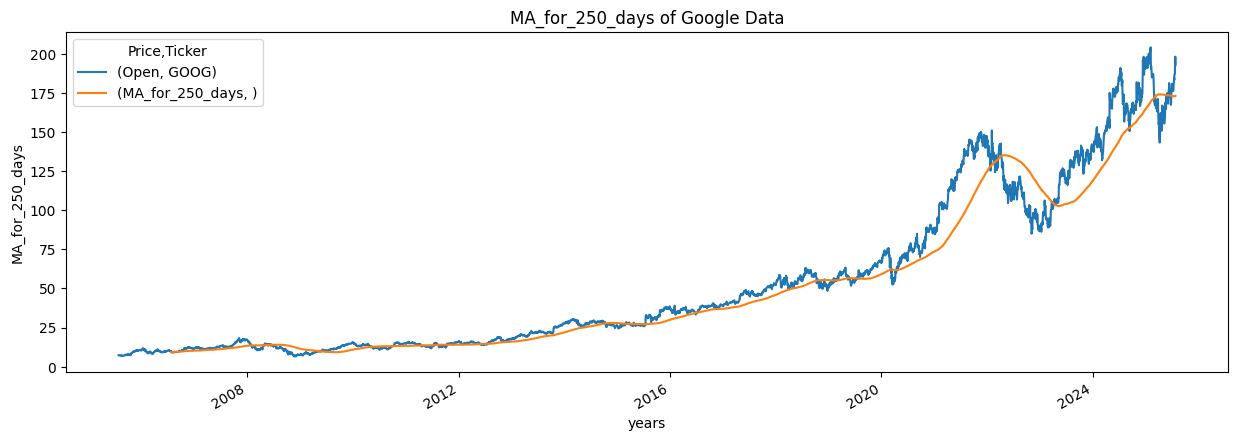

In [18]:
plot_graph((15,5), google_data[['Open','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

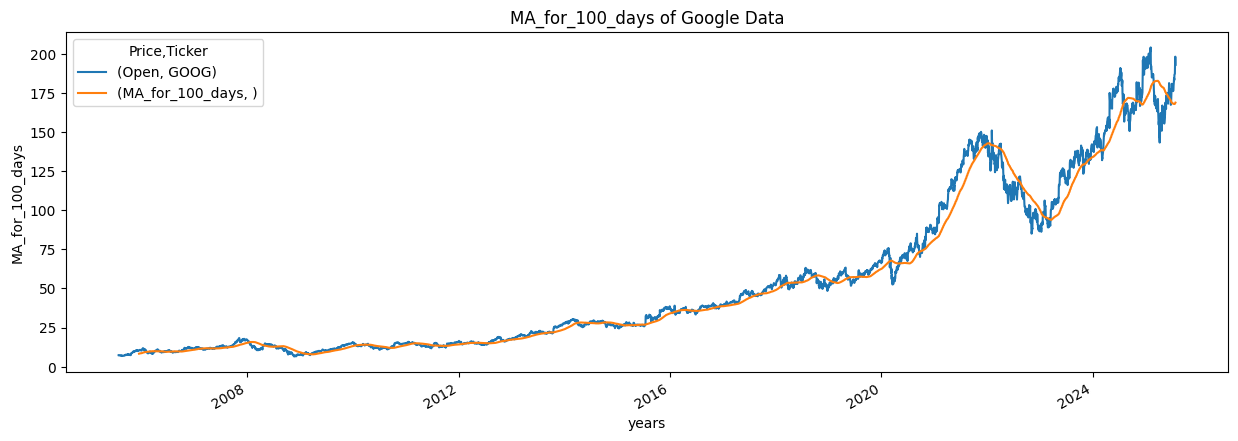

In [19]:
google_data['MA_for_100_days'] = google_data['Open']['GOOG'].rolling(100).mean()
plot_graph((15,5), google_data[['Open','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

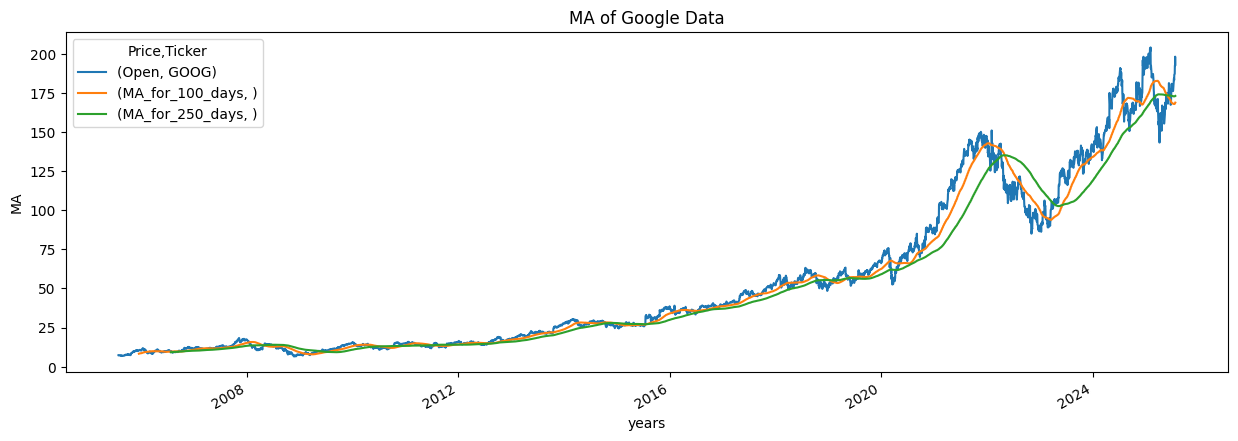

In [20]:
plot_graph((15,5), google_data[['Open','MA_for_100_days','MA_for_250_days']], 'MA')

In [21]:
google_data['percentage_change_cp'] = google_data['Open']['GOOG'].pct_change()
google_data['percentage_change_cp']

Date
2005-07-27         NaN
2005-07-28   -0.001108
2005-07-29   -0.017720
2005-08-01   -0.013761
2005-08-02    0.012078
                ...   
2025-07-21    0.002572
2025-07-22    0.028434
2025-07-23   -0.000312
2025-07-24    0.029892
2025-07-25   -0.026147
Name: percentage_change_cp, Length: 5031, dtype: float64

<Figure size 640x480 with 0 Axes>

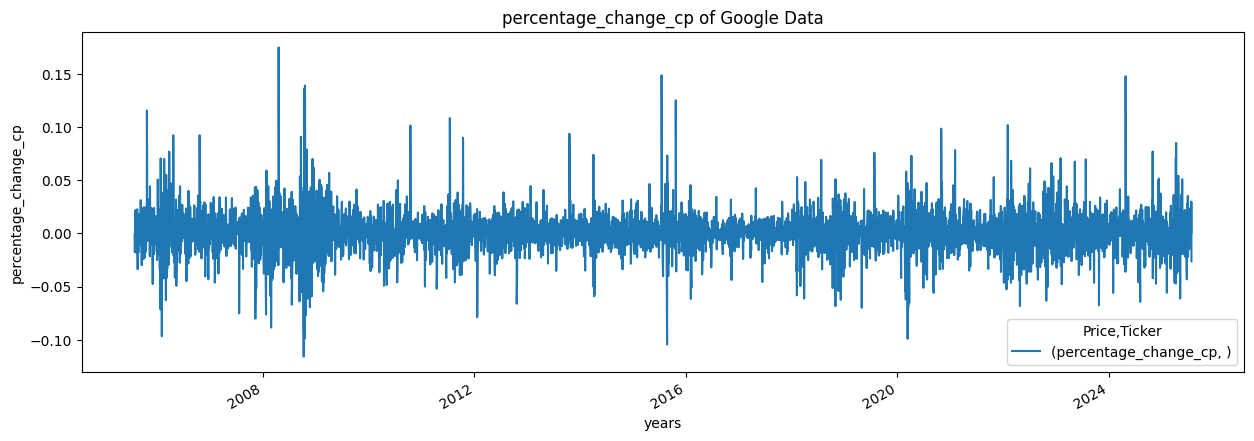

In [22]:
plot_graph((15,5), google_data[['percentage_change_cp']], 'percentage_change_cp')

In [23]:
Close_price = google_data[['Close']]

In [24]:
max(Close_price.values),min(Close_price.values)

(array([207.22454834]), array([6.37407732]))

In [25]:
# !pip install scikit-learn

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Close_price)
scaled_data

array([[0.00486807],
       [0.00444523],
       [0.00373765],
       ...,
       [0.92175994],
       [0.93017417],
       [0.93455556]])

In [27]:
x_data = []
y_data = []

for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data,y_data = np.array(x_data), np.array(y_data)

In [28]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Input

In [30]:
model = Sequential()
model.add(Input(shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [31]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 106s 30ms/step - loss: 3.2365e-04
Epoch 2/2
3451/3451 ━━━━━━━━━━━━━━━━━━━━ 103s 30ms/step - loss: 5.6540e-05


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [34]:
predictions = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


In [35]:
predictions

array([[0.26947525],
       [0.27305046],
       [0.2750321 ],
       ...,
       [0.92551076],
       [0.9288318 ],
       [0.93290305]], dtype=float32)

In [36]:
inv_pred = scaler.inverse_transform(predictions)
inv_pred

array([[ 60.49831 ],
       [ 61.216393],
       [ 61.614407],
       ...,
       [192.26335 ],
       [192.93039 ],
       [193.7481  ]], dtype=float32)

In [37]:
inv_y = scaler.inverse_transform(y_test)
inv_y

array([[ 60.21109772],
       [ 59.89049911],
       [ 59.86465073],
       ...,
       [191.50999451],
       [193.19999695],
       [194.08000183]])

In [38]:
rmse = np.sqrt(np.mean( (inv_pred - inv_y)**2))

In [39]:
rmse

np.float64(3.766662418907085)

In [41]:
import pandas as pd

ploting_data = pd.DataFrame(
    {
        'orginal_test_data': inv_y.reshape(-1),
        'predictions': inv_pred.reshape(-1),
    },
    index = google_data.index[splitting_len + 100 : splitting_len + 100 + len(inv_y)]
)

ploting_data.head()


orginal_test_data  predictions
Date                                      
2019-09-05          60.211098    60.498310
2019-09-06          59.890499    61.216393
2019-09-09          59.864651    61.614407
2019-09-10          59.943687    61.748531
2019-09-11          60.647995    61.786434

<Figure size 640x480 with 0 Axes>

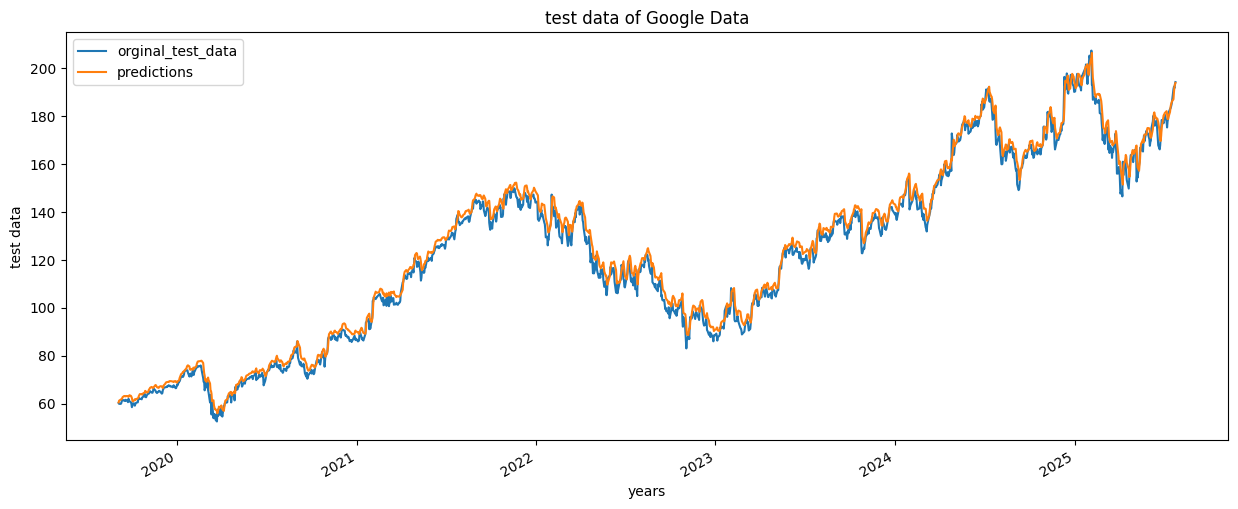

In [42]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

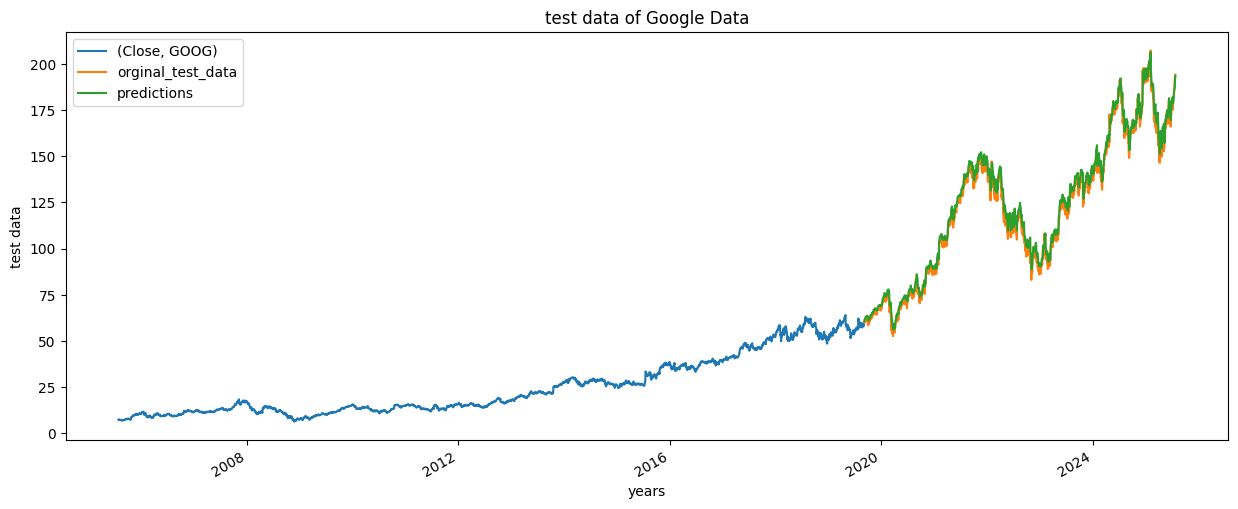

In [46]:
plot_graph((15,6), pd.concat([Close_price[:splitting_len+100],ploting_data], axis=0), 'test data')

In [47]:
model.save("Latest_stock_price_model.keras")